In [55]:
import numpy as np
from datascience import *
import matplotlib.pylab as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [56]:
wheel = Table.read_table("roulette_wheel.csv")

In [57]:
wheel.show(40)

Pocket,Color
0,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


La apuesta al rojo paga 1 a 1. Hemos definido la función red_winnings que devuelve las ganancias netas de una apuesta de $1 al rojo. Específicamente, la función toma un color como argumento y devuelve 1 si el color es rojo. Para todos los demás colores devuelve -1.

In [61]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

In [68]:
red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
red

Pocket,Color,Winnings: Red
0,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


In [69]:
print(red.where("Winnings: Red", are.equal_to(1))["Winnings: Red"].sum())
average_win = 1*(18/38) #+ (-1)*(20/38)
average_loss = 1*(20/38) 
print(average_win*100)
print(average_loss*100)

18
47.368421052631575
52.63157894736842


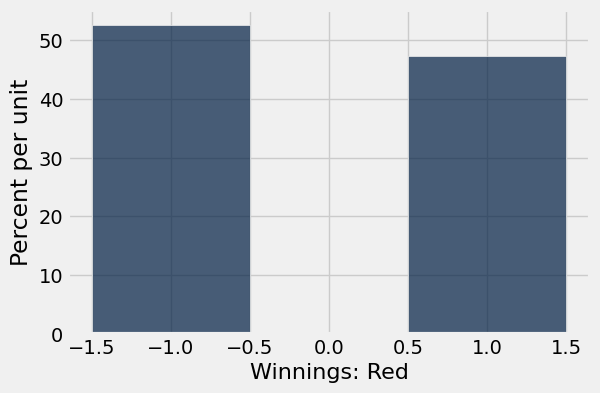

In [70]:
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))

In [73]:
num_bets = 400
spins = red.sample(num_bets)
spins

Pocket,Color,Winnings: Red
20,black,-1
36,red,1
19,red,1
8,black,-1
6,black,-1
0,green,-1
21,red,1
36,red,1
33,black,-1
19,red,1


In [75]:
num_bets = 400
repetitions = 10000
net_gain_red = make_array()
apuesta = 1

for i in range(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)

results = Table().with_column('Net Gain on Red', net_gain_red)  
results

Net Gain on Red
-24
-2
-42
4
-58
16
20
-8
-10
-40


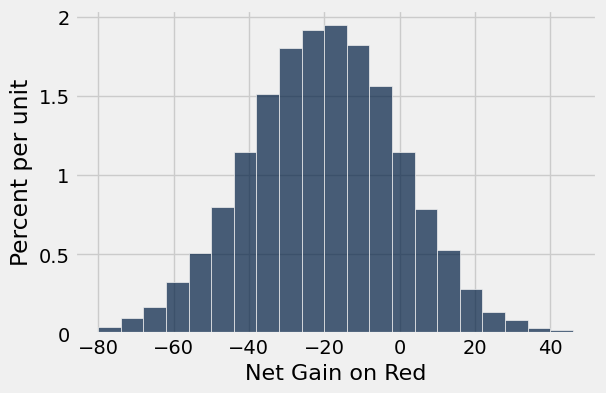

In [76]:
results.hist(bins=np.arange(-80, 50, 6))

Si apuesto un peso, y como la probabilidad de ganar es de 18/38, por cada dolar tengo 
la posiblidad de ganar 1*18/38, Y de perder 20/38, es decir, que en total, tengo la posiblidad de ganar $(1*(18/38) + (-1)*(20/38))$

In [82]:
average_per_bet = 5000*(1*(18/38) + (-1)*(20/38))
average_per_bet

-263.1578947368421

In [83]:
# Si apuesta 5000, evalor de perdida despues de 400 apuesta es de: 
average_per_bet*400

-105263.15789473683

In [84]:
np.std(results.column(0))

20.09149677251548

# Retraso promedio del vuelo

In [86]:
united = Table.read_table("united.csv")

In [87]:
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


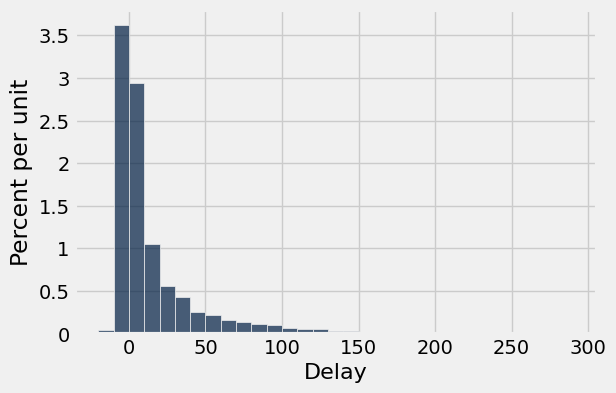

In [88]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [115]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))
mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [116]:
# Muestreo
delay = united.select('Delay')

In [117]:
np.mean(delay.sample(400).column('Delay'))

19.050000000000001

In [118]:
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Mean', means
)

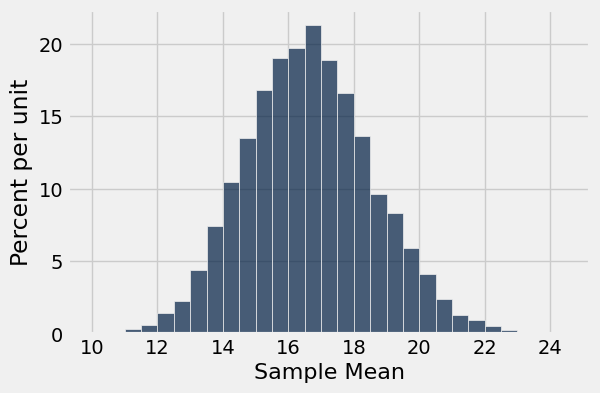

In [119]:
results.hist(bins=np.arange(10, 25, 0.5))

In [120]:
np.mean (results.column(0))

16.639444000000001

In [121]:
np.std (results.column(0))

1.9493298767432874

# Teorema del limite central

El Teorema del Límite Central dice que la distribución de probabilidad de la suma o el promedio de una gran muestra aleatoria extraída con reemplazo será más o menos normal, independientemente de la distribución de la población de la que se extrae la muestra.

# Proporcion de flores moradas



In [126]:
colors = make_array('Purple', 'Purple', 'Purple', 'White')
model = Table().with_column('Color', colors)
model

Color
Purple
Purple
Purple
White


In [132]:
props = make_array()

num_plants = 200
repetitions = 10000

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props = np.append(props, new_prop)
    
results = Table().with_column('Sample Proportion: 200', props)

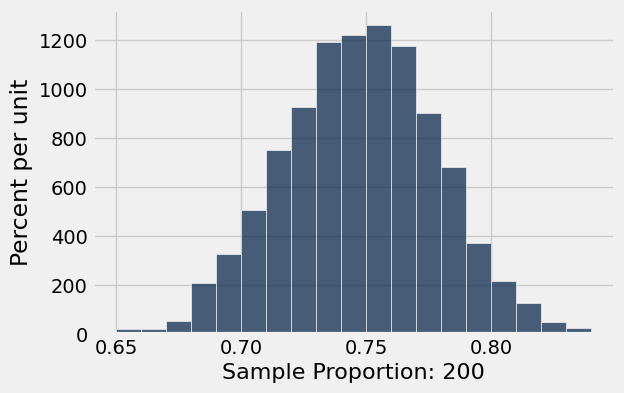

In [133]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))
# Curva normal, centada al rededor de 0.75

In [134]:
props2 = make_array()

num_plants = 800

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props2 = np.append(props2, new_prop)
    
results = results.with_column('Sample Proportion: 800', props2)

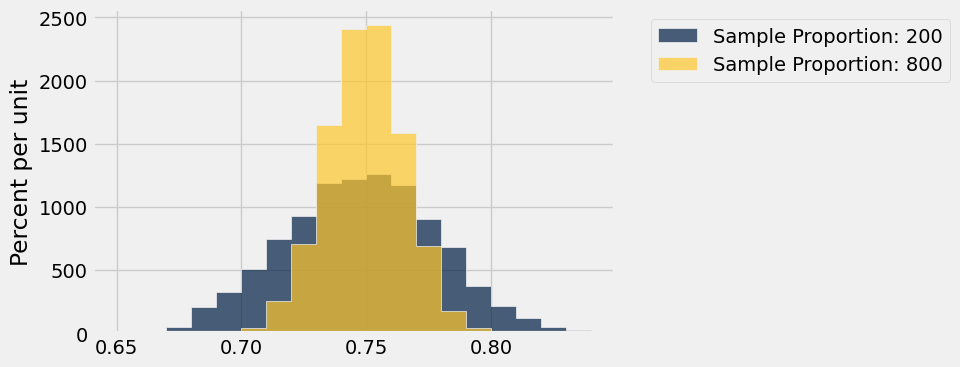

In [135]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

Ambas distribuciones son aproximadamente normales, pero una es más estrecha que la otra. Las proporciones basadas en un tamaño de muestra de 800 están más estrechamente agrupadas alrededor de 0,75 que las de un tamaño de muestra de 200. Aumentar el tamaño de la muestra ha disminuido la variabilidad en la proporción de la muestra.

¿Exactamente cómo afecta el tamaño de la muestra a la variabilidad del promedio o proporción de una muestra?

# Variabilidad de la media

In [154]:
united = Table.read_table('united.csv')
delay = united.select('Delay')
pop_mean = np.mean(delay.column('Delay'))
pop_mean

16.658155515370705

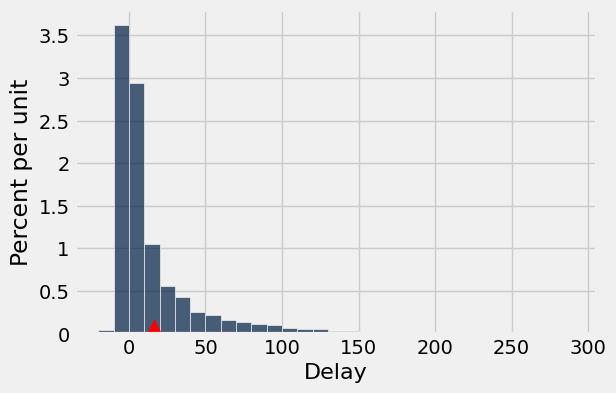

In [155]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))
plots.plot(pop_mean,0,"^",ms=20,color="red")

In [156]:
# Construyamos una funcion que nos permita definir diferentes muestras sobre un conjunto 
# determinado de experimentos

In [141]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.589241
Population SD: 39.4801998516
SD of sample means: 3.95817834286


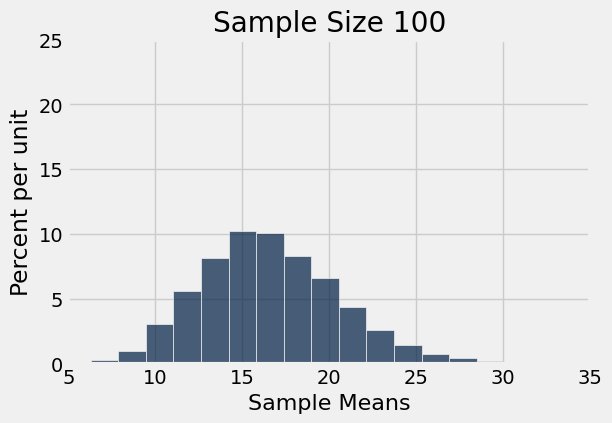

In [157]:
simulate_sample_mean(delay, 'Delay', sample_size=100, repetitions=10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.67763225
Population SD: 39.4801998516
SD of sample means: 1.97679226669


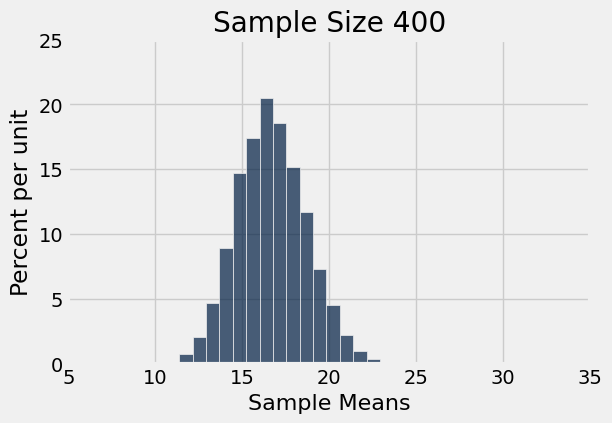

In [158]:
simulate_sample_mean(delay, 'Delay', 400, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  625
Population mean: 16.6581555154
Average of sample means:  16.63238256
Population SD: 39.4801998516
SD of sample means: 1.57574808864


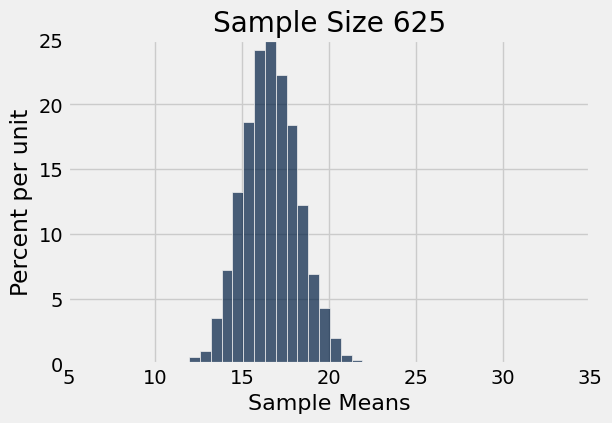

In [159]:
simulate_sample_mean(delay, 'Delay', 625, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

# El SD de todos las medias de la muestra

In [183]:
pop_sd = np.std(delay.column('Delay'))
pop_sd

39.480199851609314

In [163]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_means = make_array()
mean_mean=make_array()
for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay.sample(n).column('Delay')))
    mean_mean=np.append(mean_mean, np.mean(means))
    sd_means = np.append(sd_means, np.std(means))

In [164]:
mean_mean

array([ 16.742664  ,  16.734722  ,  16.65061867,  16.647526  ,
        16.7328528 ,  16.62428733,  16.67630629,  16.6424435 ,
        16.65078978,  16.6701488 ,  16.65861782,  16.67312833,
        16.62425262,  16.638804  ,  16.67385253,  16.64605275,
        16.67366894,  16.65838022,  16.66530358,  16.6443628 ,
        16.6857939 ,  16.66991818,  16.63627061,  16.6435175 ,  16.6637616 ])

Text(0.5, 0, 'Sample Size')

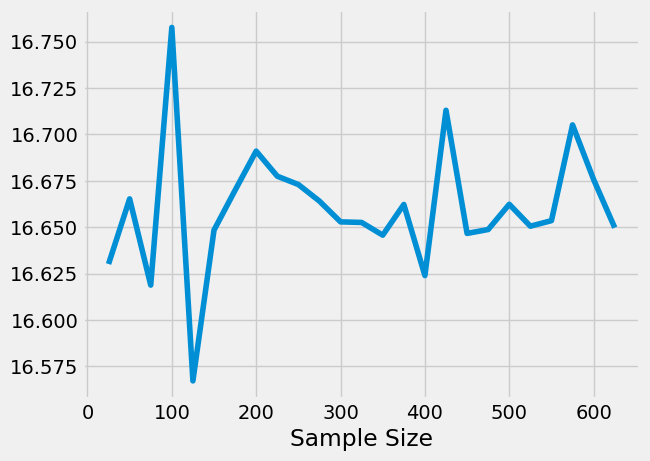

In [148]:
plots.plot(sample_sizes,mean_mean)
plots.xlabel("Means")
plots.xlabel("Sample Size")

In [181]:
sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_sd/np.sqrt(sample_sizes),
    "mean_mean", mean_mean
)

In [179]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",pop_sd/sqrt(n),mean_mean
25,7.82925,7.89604,16.7427
50,5.63714,5.58334,16.7347
75,4.57068,4.55878,16.6506
100,3.94045,3.94802,16.6475
125,3.56274,3.53122,16.7329
150,3.21702,3.22354,16.6243
175,2.9852,2.98442,16.6763
200,2.84456,2.79167,16.6424
225,2.66563,2.63201,16.6508
250,2.49438,2.49695,16.6701


Text(0, 0.5, 'SD')

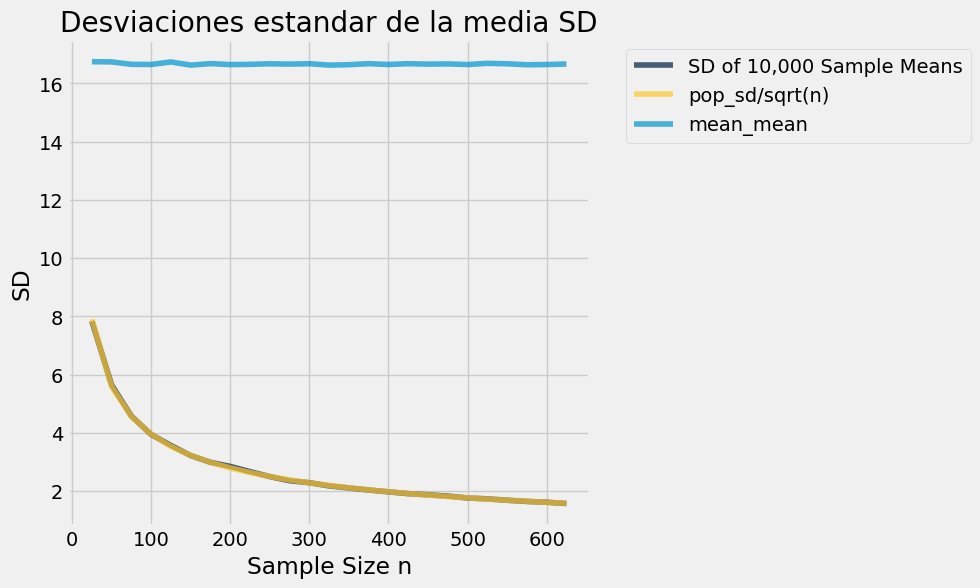

In [180]:
sd_comparison.plot('Sample Size n')
plots.title("Desviaciones estandar de la media SD")
plots.ylabel("SD")

# Desviacion estandar
\begin{equation}
S = \frac{\sigma}{\sqrt{N}}
\end{equation}


La fórmula muestra que:

- El tamaño de la población no afecta la precisión de la media de la muestra. El tamaño de la población no aparece en ninguna parte de la fórmula.
  
- La $\sigma$ de la población es una constante; es la misma para cada muestra extraída de la población. El tamaño de la muestra se puede variar. Debido a que el tamaño de la muestra aparece en el denominador, la variabilidad de la media de la muestra disminuye a medida que aumenta el tamaño de la muestra y, por lo tanto, aumenta la precisión.


# ¿Cómo elegir el tamano de la muestra?

\begin{equation}
\sqrt{N} = \frac{\sigma}{S}
\end{equation}

In [194]:
from scipy import stats

In [196]:
x = np.linspace(-4.5, 4.5, 100)
sigma = 1
mu = 0
y = stats.norm.pdf(x,mu,sigma)

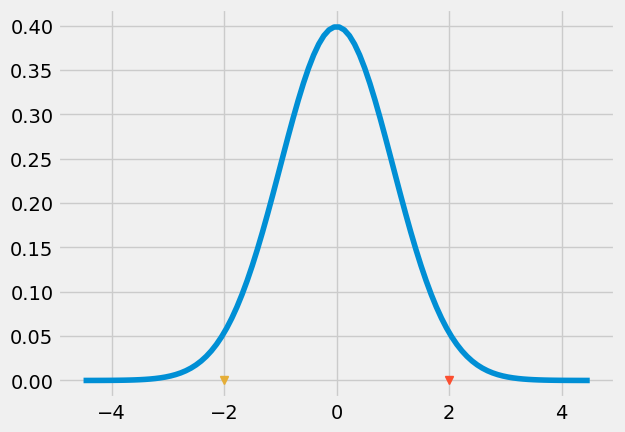

In [197]:
plots.plot(x, y)
plots.plot(2,0,"v")
plots.plot(-2,0,"v")

In [199]:
(stats.norm.cdf(2)-stats.norm.cdf(-2))*100


95.449973610364154

In [200]:
# 2*sigma confiabilidad del 95%

In [201]:
N = (2/0.01)**2
N

40000.0